# Galaxy vs Quasars

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

C:\Users\loren\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\loren\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


I read an extraction of a SDSS dataset regarding the filter response as a function of the wavelength (redshift).

In [2]:
data = pd.read_csv("../solutions/galaxyquasar.csv")

In [3]:
data

,u,g,r,i,z,class,z1,zerr
0,18.97213,18.53676,18.58280,18.34936,18.29215,QSO,0.522819,0.000155
1,19.24592,17.47646,16.47817,16.04472,15.68851,GALAXY,0.122846,0.000028
2,19.43536,17.70268,16.91565,16.58327,16.39128,GALAXY,0.000000,0.000000
3,19.31626,18.18312,17.39591,16.94549,16.65395,GALAXY,0.147435,0.000009
4,19.28828,19.11188,18.88937,18.80013,18.49183,QSO,2.011455,0.000631
...,...,...,...,...,...,...,...,...
49995,19.37295,18.12382,17.39886,16.98503,16.70585,GALAXY,0.113016,0.000011
49996,18.52021,16.88262,16.03280,15.56884,15.22454,GALAXY,0.085063,0.000014
49997,18.62718,17.30876,16.87371,16.62399,16.42296,GALAXY,0.054429,0.000008
49998,19.55140,18.27711,17.62101,17.21947,17.03347,GALAXY,0.112571,0.000009


I create arrays for the colors and assign a label to each object.

In [4]:
u_g = np.array(data['u'] - data['g'])
g_r = np.array(data['g'] - data['r'])
r_i = np.array(data['r'] - data['i'])
i_z = np.array(data['i'] - data['z'])

In [5]:
lab = data['class']
lab

0           QSO
1        GALAXY
2        GALAXY
3        GALAXY
4           QSO
          ...  
49995    GALAXY
49996    GALAXY
49997    GALAXY
49998    GALAXY
49999    GALAXY
Name: class, Length: 50000, dtype: object

I explore now these variables through a corner plot.

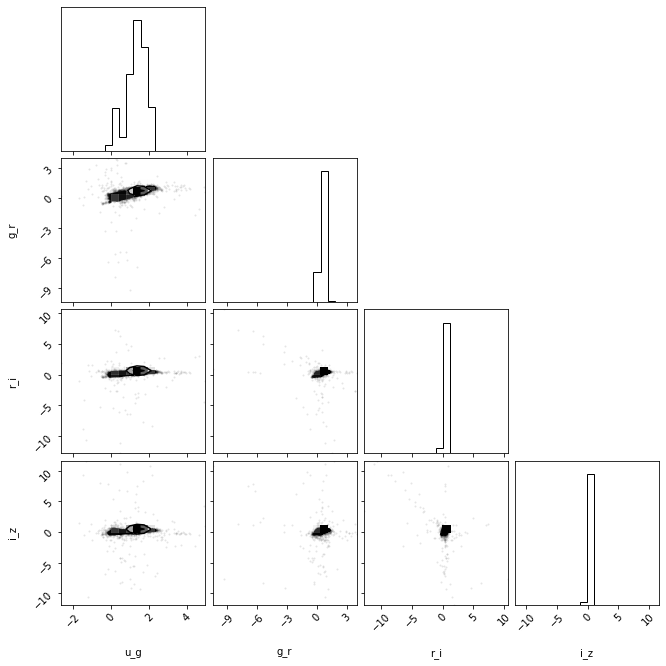

In [6]:
import corner
corner.corner(np.array([u_g, g_r, r_i, i_z]).T, labels = ['u_g', 'g_r', 'r_i', 'i_z'])
plt.show()

I can see that we have a bimodality in the color "u_g".

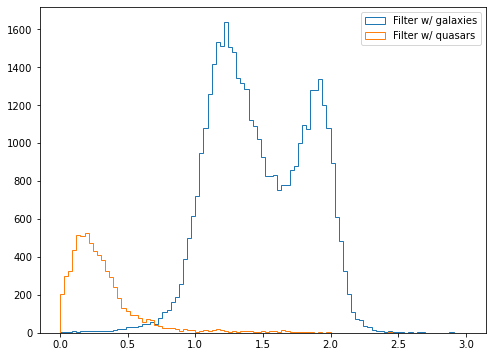

In [7]:
fig = plt.figure(figsize=(8, 6))
plt.hist(u_g[lab == 'GALAXY'], histtype = 'step', bins=np.linspace(0,3,100), label='Filter w/ galaxies')
plt.hist(u_g[lab == 'QSO'], histtype = 'step', bins=np.linspace(0,3,100), label='Filter w/ quasars')
plt.legend();

I prepare the arrays for some classification.

In [8]:
X = np.array([u_g, g_r, r_i, i_z]).T
y = np.array(lab == 'QSO', dtype=int)

In [9]:
import sklearn.model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from astroML.classification import GMMBayes
from sklearn.neighbors import KNeighborsClassifier

As usual, i separe the data between training and test sets.

In [10]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
X_train.shape

(33500, 4)

I now use some classification techniques in order to evaulate the performance of each.

**Gaussian Naive Bayes**

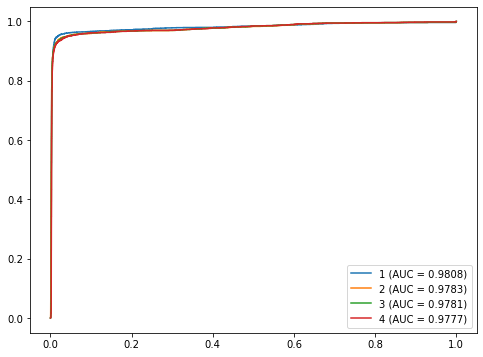

In [14]:
fig = plt.figure(figsize=(8, 6))
clf = GaussianNB()

auc_scores = []

for i in range(4):
    clf.fit(X_train[:,0:i+1], y_train)
    y_prob = clf.predict_proba(X_test[:,0:i+1]) [:,1]
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob)
    auc = metrics.roc_auc_score(y_test, y_prob)
    auc_scores.append(auc)
    
    plt.plot(fpr, tpr, label=f'{i+1} (AUC = {auc:.4f})')
plt.legend()
plt.show()

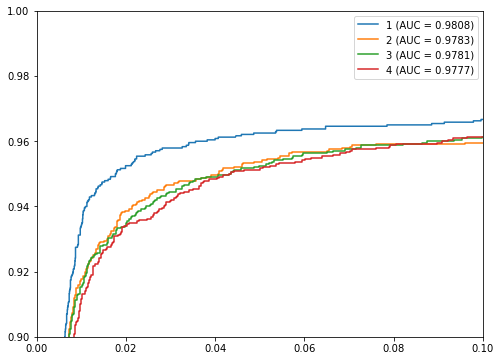

In [15]:
# let's cut it down a little
fig = plt.figure(figsize=(8, 6))
clf = GaussianNB()

auc_scores = []

for i in range(4):
    clf.fit(X_train[:,0:i+1], y_train)
    y_prob = clf.predict_proba(X_test[:,0:i+1]) [:,1]
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob)
    auc = metrics.roc_auc_score(y_test, y_prob)
    auc_scores.append(auc)
    
    plt.plot(fpr, tpr, label=f'{i+1} (AUC = {auc:.4f})')
plt.legend()
plt.xlim(0,0.1)
plt.ylim(0.9,1)
plt.show()

**Quadratic Discriminant Analysis**

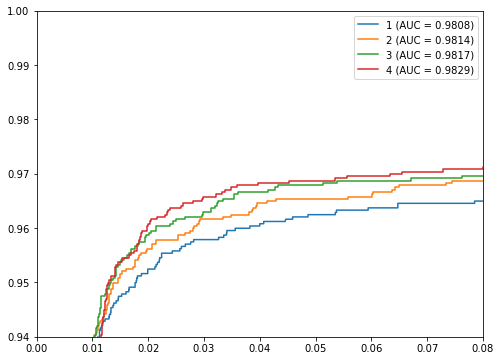

In [16]:
fig = plt.figure(figsize=(8, 6))
clf = QuadraticDiscriminantAnalysis()

auc_scores = []

for i in range(4):
    clf.fit(X_train[:,0:i+1], y_train)
    y_prob = clf.predict_proba(X_test[:,0:i+1]) [:,1]
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob)
    auc = metrics.roc_auc_score(y_test, y_prob)
    auc_scores.append(auc)
    
    plt.plot(fpr, tpr, label=f'{i+1} (AUC = {auc:.4f})')
plt.legend()
plt.xlim(0,0.08)
plt.ylim(0.94,1)
plt.show()

**Gaussian Mixture Model Bayes**

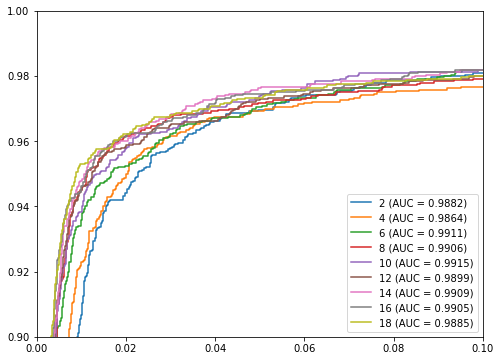

In [17]:
fig = plt.figure(figsize=(8, 6))

auc_scores = []

for n in np.arange(2, 20)[::2]:
    
    clf = GMMBayes(n_components = n)
    clf.fit(X_train[:,0:4], y_train)
    y_prob = clf.predict_proba(X_test[:,0:4]) [:,1]
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob)
    auc = metrics.roc_auc_score(y_test, y_prob)
    auc_scores.append(auc)
    
    plt.plot(fpr, tpr, label=f'{n} (AUC = {auc:.4f})')
plt.legend(loc='lower right')
plt.xlim(0,0.1)
plt.ylim(0.9,1)
plt.show()

**K Neighbors**

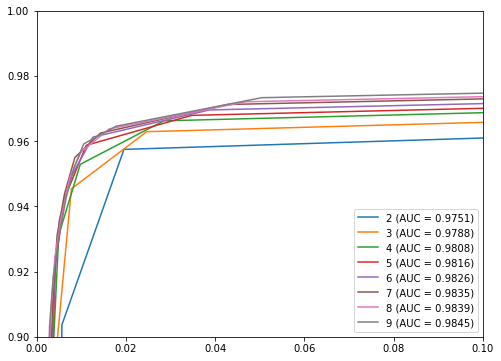

In [18]:
fig = plt.figure(figsize=(8, 6))

auc_scores = []

for n in np.arange(2, 10):
    
    clf = KNeighborsClassifier(n_neighbors = n)
    clf.fit(X_train[:,0:4], y_train)
    y_prob = clf.predict_proba(X_test[:,0:4]) [:,1]
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob)
    auc = metrics.roc_auc_score(y_test, y_prob)
    auc_scores.append(auc)
    
    plt.plot(fpr, tpr, label=f'{n} (AUC = {auc:.4f})')
plt.legend(loc='lower right')
plt.xlim(0,0.1)
plt.ylim(0.9,1)
plt.show()

By looking at the AUC values, the better performing classifier is GMMBayes.

In [19]:
clf = GMMBayes(n_components = 4)
clf.fit(X_train[:,0:4], y_train)
y_pred = clf.predict(X[:,0:4])

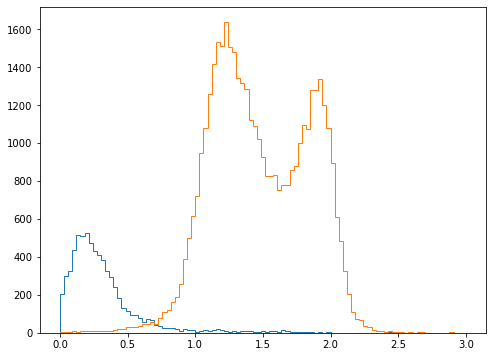

In [20]:
fig = plt.figure(figsize=(8, 6))
plt.hist(u_g[lab == 'QSO'], histtype = 'step', bins=np.linspace(0,3,100))
plt.hist(u_g[lab == 'GALAXY'], histtype = 'step', bins=np.linspace(0,3,100))
plt.show();

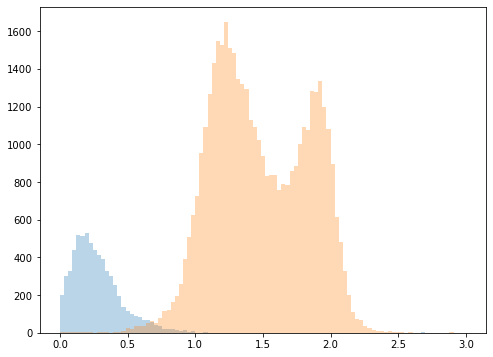

In [21]:
fig = plt.figure(figsize=(8, 6))
plt.hist(u_g[y_pred == 1], histtype = 'stepfilled', bins=np.linspace(0,3,100), alpha = 0.3)
plt.hist(u_g[y_pred == 0], histtype = 'stepfilled', bins=np.linspace(0,3,100), alpha = 0.3)
plt.show();

I can ask myself if the feature u_g is actually the most important one.

In [32]:
features = ['u_g', 'g_r', 'r_i', 'i_z']
auc_scores = []
clf = GaussianNB()

for i in range(4):
    clf.fit(X_train[:, i].reshape(-1, 1), y_train)
    y_prob = clf.predict_proba(X_test[:, i].reshape(-1, 1))[:, 1]
    
    auc = metrics.roc_auc_score(y_test, y_prob)
    auc_scores.append(auc)
    print(f"AUC with feature {features[i]}: {auc:.4f}")

best_feature_index = np.argmax(auc_scores)
print(f"The most important feature is {features[best_feature_index]} with AUC = {auc_scores[best_feature_index]:.4f}")

AUC with feature u_g: 0.9808
AUC with feature g_r: 0.9431
AUC with feature r_i: 0.8996
AUC with feature i_z: 0.8388
The most important feature is u_g with AUC = 0.9808


In the Naive Bayes classification, it is assumed independence between the attributes. But is this really the case?

In order to answer this question i can compute a correlation coefficient between these variables, using for example the *Pearson* definition.

In [40]:
from scipy.stats import pearsonr

for i in range(4):
    for j in range(i+1, 4):
        corr, p_value = pearsonr(X_test[:, i], X_test[:, j])
        print(f'Correlation between features {features[i]} and {features[j]}: {corr:.4f}')

Correlation between features u_g and g_r: 0.8325
Correlation between features u_g and r_i: 0.5797
Correlation between features u_g and i_z: 0.4561
Correlation between features g_r and r_i: 0.5291
Correlation between features g_r and i_z: 0.4557
Correlation between features r_i and i_z: 0.2243


I can notice that the most correlated features are u_g and g_r, as i expected from the corner plot done before.